# Solutions for block D

In [1]:
import contextily
import geopandas, pandas
import seaborn as sns
import matplotlib.pyplot as plt
from pysal.viz import mapclassify as mc

## Data

- Geometries

In [2]:
p = ("Access_to_Healthy_Assets_and_Hazards_AHAH_E08000012/data/"\
     "Access_to_Healthy_Assets_and_Hazards_AHAH/"\
     "Local_Authority_Districts/E08000012/shapefiles/"\
     "E08000012.shp"
    )
lsoas = geopandas.read_file(p)

- Tabular data

In [3]:
p = ("Access_to_Healthy_Assets_and_Hazards_AHAH_E08000012/data/"\
     "Access_to_Healthy_Assets_and_Hazards_AHAH/"\
     "Local_Authority_Districts/E08000012/tables/"\
     "E08000012.csv"
    )
ahah_data = pandas.read_csv(p)

- Merge

In [4]:
ahah = lsoas.join(ahah_data.set_index("lsoa11cd"), on="lsoa11cd")

## Task I

- 5-class equal interval

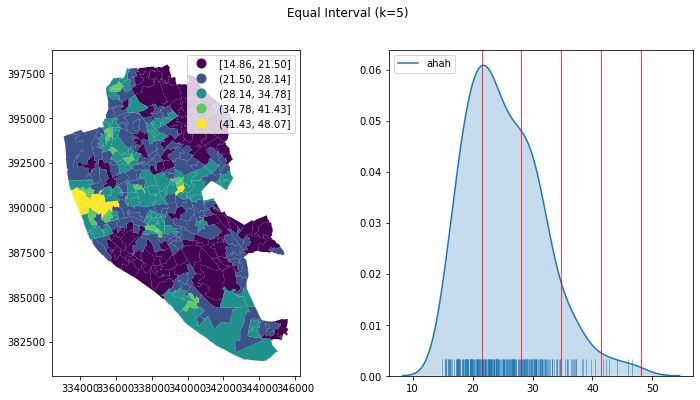

In [5]:
# Set up figure and axes
f, axs = plt.subplots(1, 2, figsize=(12, 6))
# Plot map to first axis
ahah.plot(column="ahah", 
          scheme="equal_interval",
          k=5,
          legend=True,
          ax=axs[0]
         )
# KDE
classi = mc.EqualInterval(ahah["ahah"], k=5)
# Plot the kernel density estimation (KDE)
sns.kdeplot(ahah["ahah"], ax=axs[1], shade=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(ahah["ahah"], ax=axs[1], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    axs[1].axvline(cut, color='red', linewidth=0.75)
# Title
f.suptitle("Equal Interval (k=5)")
# Display image
plt.show()

- 5-class quantiles

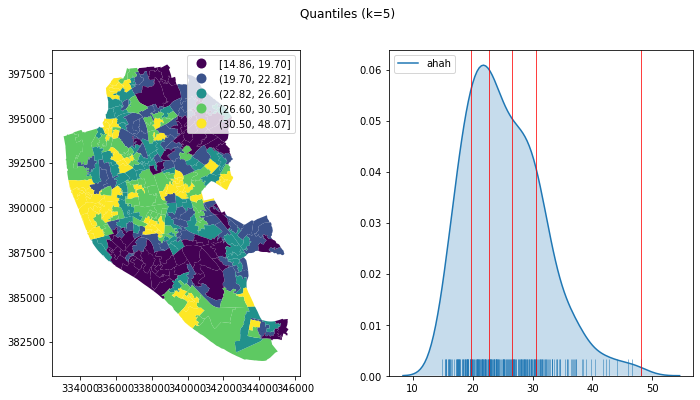

In [6]:
# Set up figure and axes
f, axs = plt.subplots(1, 2, figsize=(12, 6))
# Plot map to first axis
ahah.plot(column="ahah", 
          scheme="Quantiles",
          k=5,
          legend=True,
          ax=axs[0]
         )
# KDE
classi = mc.Quantiles(ahah["ahah"], k=5)
# Plot the kernel density estimation (KDE)
sns.kdeplot(ahah["ahah"], ax=axs[1], shade=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(ahah["ahah"], ax=axs[1], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    axs[1].axvline(cut, color='red', linewidth=0.75)
# Title
f.suptitle("Quantiles (k=5)")
# Display image
plt.show()

- 5-class Fisher-Jenks

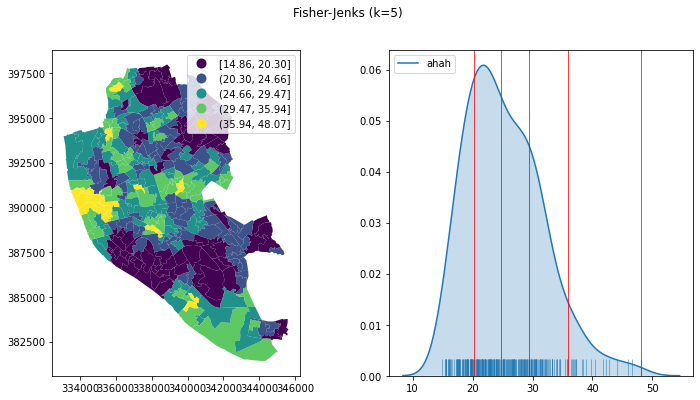

In [7]:
# Set up figure and axes
f, axs = plt.subplots(1, 2, figsize=(12, 6))
# Plot map to first axis
ahah.plot(column="ahah", 
          scheme="fisher_jenks",
          k=5,
          legend=True,
          ax=axs[0]
         )
# KDE
classi = mc.FisherJenks(ahah["ahah"], k=5)
# Plot the kernel density estimation (KDE)
sns.kdeplot(ahah["ahah"], ax=axs[1], shade=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(ahah["ahah"], ax=axs[1], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    axs[1].axvline(cut, color='red', linewidth=0.75)
# Title
f.suptitle("Fisher-Jenks (k=5)")
# Display image
plt.show()

- Above/below unique value

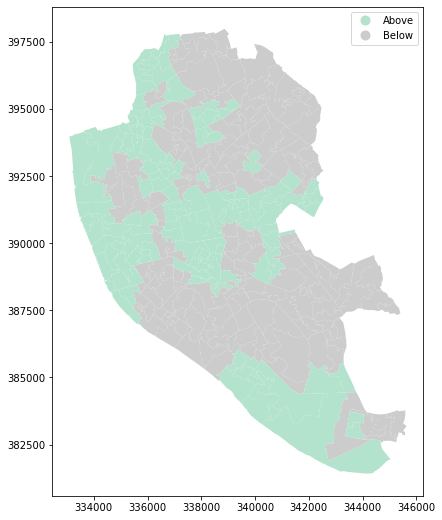

In [8]:
# Make a new column with every value set to "above"
ahah["above_below"] = "Above"
# Retrieve values below the average and switch to "below"
ahah.loc[ahah["ahah"] < ahah["ahah"].mean(),
         "above_below"
        ] = "Below"
# Plot map
ahah.plot(column="above_below", 
          categorical=True,
          cmap="Pastel2",
          legend=True,
          figsize=(9, 9)
         );

## Task II

- Zoom of the [city centre of Liverpool](https://osm.org/go/euf9EJpQ-?m=) with he same color for every LSOA


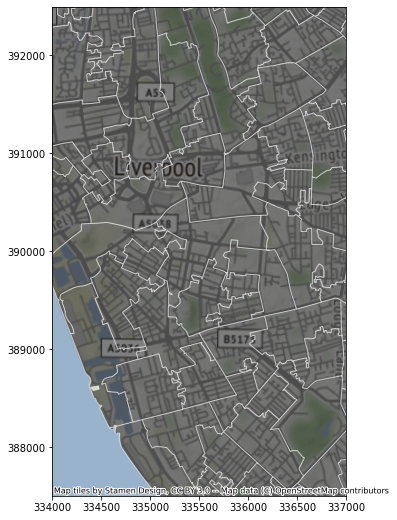

In [9]:
ax = ahah.plot(alpha=0.5,
               facecolor="k",
               edgecolor="w", 
               figsize=(9, 9)
              )
contextily.add_basemap(ax, crs=ahah.crs)
ax.set_xlim((334000, 337000))
ax.set_ylim((387500, 392500))
plt.show()

- Quantile map of AHAH for all of Liverpool, zoomed into [north of the city centre](https://osm.org/go/euf9TZJ?m=)


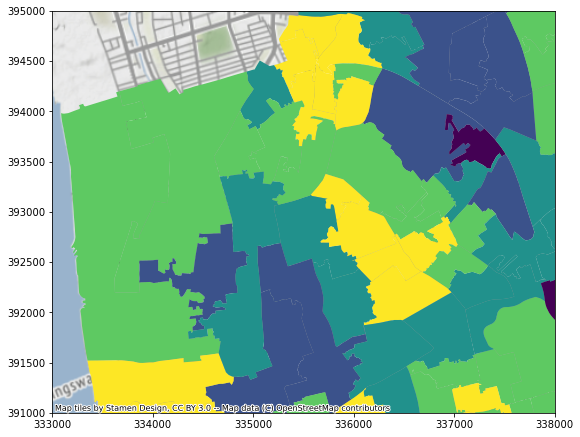

In [10]:
ax = ahah.plot(column="ahah",
               scheme="quantiles",
               figsize=(9, 9)
              )
contextily.add_basemap(ax, crs=ahah.crs)
ax.set_xlim((333000, 338000))
ax.set_ylim((391000, 395000))
plt.show()

- Zoom to [north of the city centre](https://osm.org/go/euf9TZJ?m=) with a quantile map of AHAH for the section only

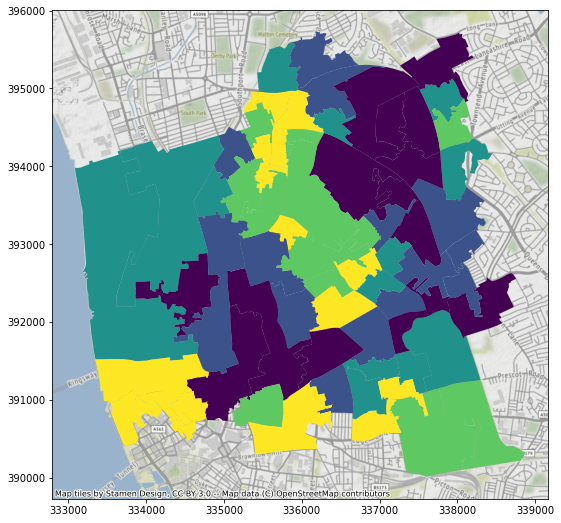

In [11]:
ax = ahah.cx[333000:338000,
             391000:395000]\
         .plot(column="ahah",
               scheme="quantiles",
               figsize=(9, 9)
              )
contextily.add_basemap(ax, crs=ahah.crs)
plt.show()